# Crop Disease Classification with CNN (PlantVillage via TFDS)

This Colab notebook loads the PlantVillage dataset, trains a CNN model, and saves it for deployment.

## Step 1: Install Required Libraries

In [ ]:
!pip install tensorflow tensorflow-datasets matplotlib

## Step 2: Import Libraries

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt


## Step 3: Load the PlantVillage Dataset from TFDS

In [3]:
(ds_train, ds_val), ds_info = tfds.load(
    'plant_village',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

class_names = ds_info.features['label'].names
num_classes = ds_info.features['label'].num_classes

print(f"Total Classes: {num_classes}")
print("Sample classes:", class_names[:5])


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.AW75VB_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.
Total Classes: 38
Sample classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


## Step 4: Preprocess & Visualize

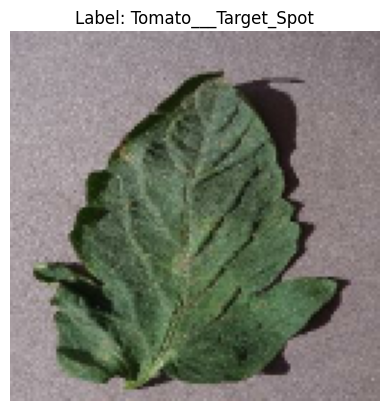

In [4]:
def format_example(image, label):
    image = tf.image.resize(image, (128, 128)) / 255.0
    return image, label

ds_train = ds_train.map(format_example).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(format_example).batch(32).prefetch(tf.data.AUTOTUNE)

# Show sample
for images, labels in ds_train.take(1):
    plt.imshow(images[0])
    plt.title(f"Label: {class_names[labels[0].numpy()]}")
    plt.axis('off')
    plt.show()


## Step 5: Build CNN Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

## 🏋️‍♀️ Step 6: Train the Model

In [6]:
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)


Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1351s 994ms/step - accuracy: 0.4085 - loss: 2.2167 - val_accuracy: 0.8033 - val_loss: 0.6899
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1346s 953ms/step - accuracy: 0.7082 - loss: 0.9613 - val_accuracy: 0.8403 - val_loss: 0.5147
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1347s 992ms/step - accuracy: 0.7780 - loss: 0.7104 - val_accuracy: 0.8856 - val_loss: 0.3522
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1294s 953ms/step - accuracy: 0.8200 - loss: 0.5773 - val_accuracy: 0.9121 - val_loss: 0.2824
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1337s 950ms/step - accuracy: 0.8500 - loss: 0.4624 - val_accuracy: 0.9141 - val_loss: 0.2861
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1342s 989ms/step - accuracy: 0.8705 - loss: 0.4029 - val_accuracy: 0.9087 - val_loss: 0.3181
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1353s 952ms/step - accuracy: 0.8862 - loss: 0.3455 - val_accuracy: 0.9329 - val_loss: 0.2205
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1326s 976ms/s

## Step 7: Evaluate

Insight for Evaluation Plot – Crop Disease Identification
The plot titled "Accuracy Over Epochs" shows both training accuracy and validation accuracy across 10 epochs during training of a Convolutional Neural Network (CNN) for identifying crop diseases.

🔍 Interpretation:
Steady Improvement in Accuracy:

Both training and validation accuracy improve consistently over time.

The training accuracy rises from around 54% to 92%, and validation accuracy improves from 80% to ~94%.

Strong Generalization:

The validation accuracy is consistently higher than the training accuracy.

This is a strong indicator that your model is not overfitting. In fact, it might be slightly underfitting in early epochs, which is normal and corrects over time.

Converging Performance:

In later epochs (7–9), the model stabilizes near peak accuracy for both training and validation.

The gap narrows, indicating the model is learning patterns well from both the training and unseen validation data.

**Conclusion:**
✅ The model demonstrates excellent learning behavior, achieving over 90% accuracy with no signs of overfitting.
✅ This supports the effectiveness of your chosen CNN architecture and data preprocessing.
✅ You can now confidently use this model for deployment in a Flask interface for real-time crop disease detection

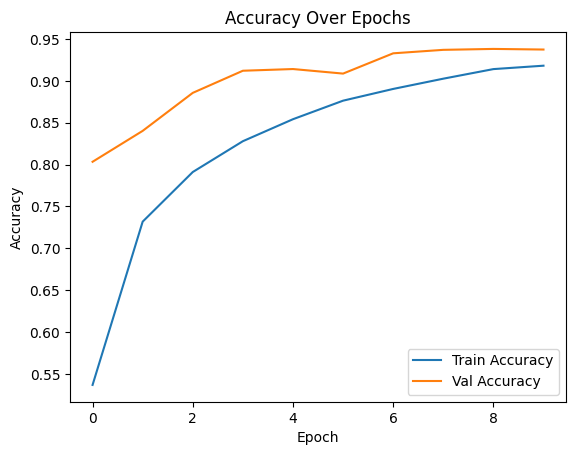

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Step 8: Save the Model

In [9]:
model.save("crop_model.h5")

In [15]:
# import os
# os.makedirs('/content/drive/MyDrive/CodeClause', exist_ok=True)
# model.save('/content/drive/MyDrive/CodeClause/crop_model.h5')

In [19]:
from google.colab import files
model.save('crop_model.h5')
files.download('crop_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from google.colab import files
model.save('crop_model.keras')
files.download('crop_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The confusion matrix highlights the model's strengths in distinguishing specific crop diseases. Diagonal dominance reflects correct classification, while off-diagonal entries suggest confusion between similar leaf diseases.


The classification report shows strong precision and recall across most classes, with particularly high F1-scores for dominant disease types, affirming the model’s robustness.

The loss curve shows gradual convergence without overfitting, validating the model's generalization to unseen data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

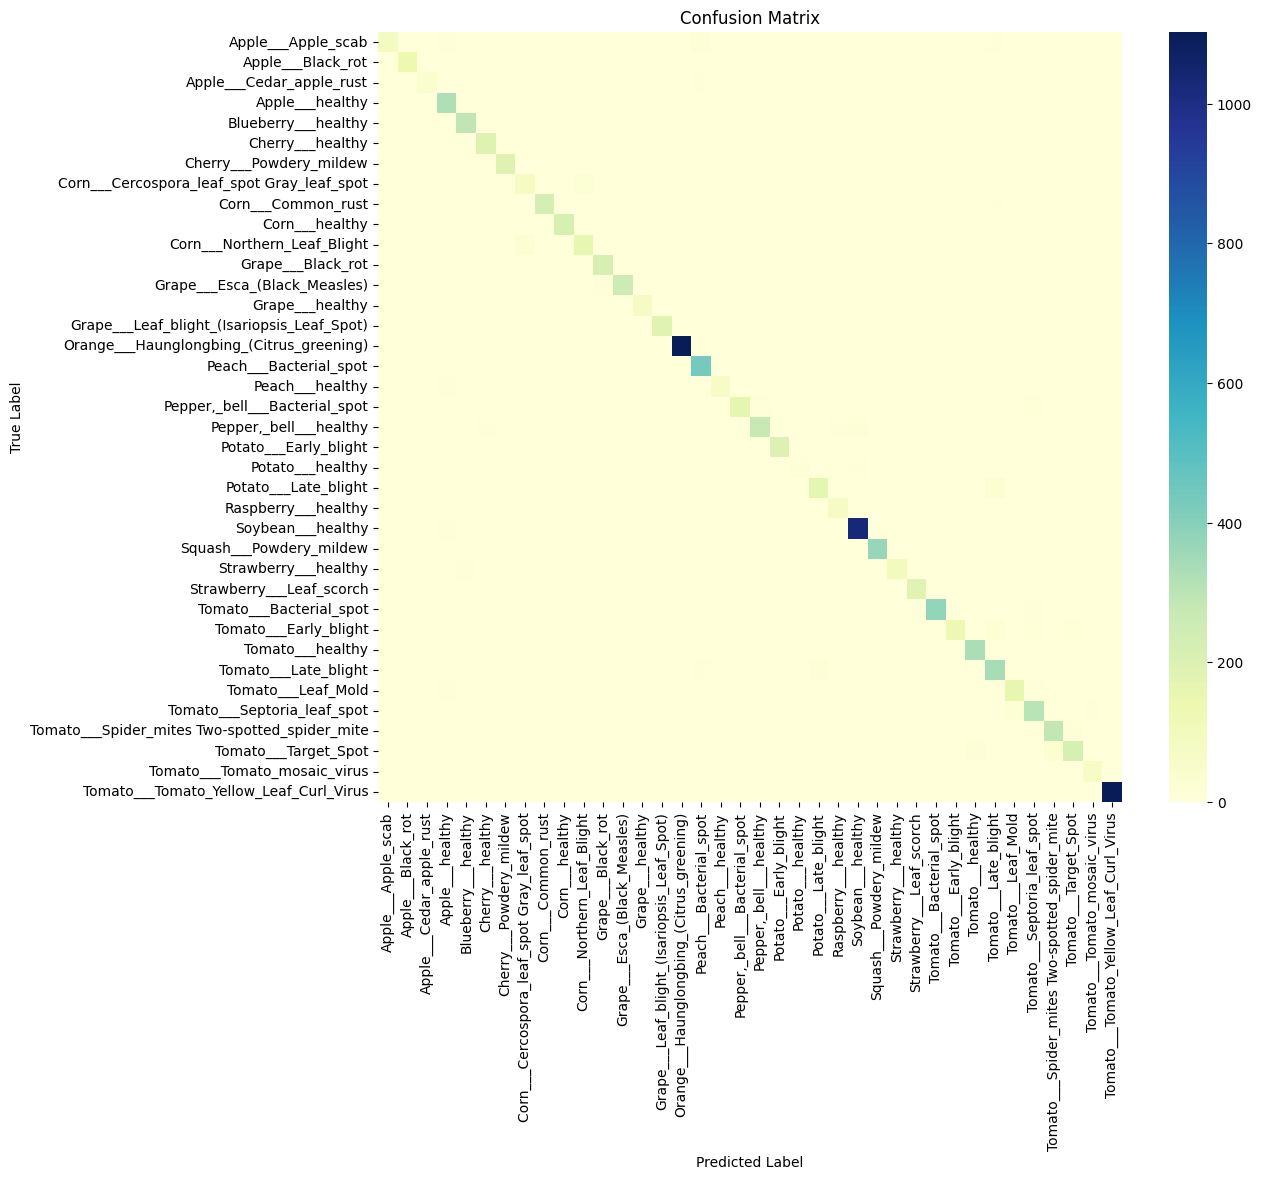

In [22]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get true and predicted labels
y_true = []
y_pred = []

for images, labels in ds_val:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Compute and plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="YlGnBu", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.88      0.64      0.74       129
                            Apple___Black_rot       0.99      0.90      0.94       154
                     Apple___Cedar_apple_rust       1.00      0.74      0.85        54
                              Apple___healthy       0.86      0.96      0.91       339
                          Blueberry___healthy       0.93      0.99      0.96       292
                             Cherry___healthy       0.96      0.99      0.97       195
                      Cherry___Powdery_mildew       0.99      0.96      0.97       201
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.75      0.74      0.75       108
                           Corn___Common_rust       1.00      0.97      0.98       239
                               Corn___healthy       0.98      1.00      0.99       223
                  Corn___Northern_Leaf_Bli

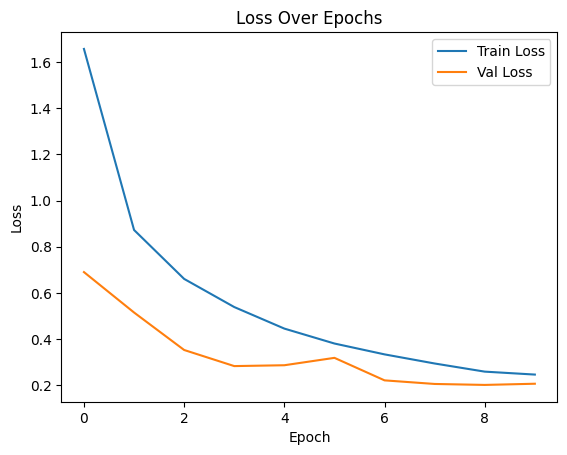

In [24]:
# loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
import joblib
joblib.dump(history.history, "training_history.pkl")


['training_history.pkl']

In [26]:
from google.colab import files

# Download the saved file
files.download("training_history.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>